In [38]:
# 필요 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [52]:
# 데이터 파일 열기 및 확인
data = pd.read_csv("hw4data.csv")
data.head()

,x,y,f_xy
0,2.476965,0.005516,17.728721
1,1.977588,1.568847,13.216848
2,0.484978,2.703197,13.977493
3,2.498437,2.726071,44.647484
4,2.619270,0.131029,19.970821


In [53]:
# 데이터 분포 분석 요약
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x,1000.0,1.546287,0.876277,0.001058,0.787667,1.551241,2.299785,2.997305
y,1000.0,1.430005,0.853935,0.000419,0.684186,1.418001,2.134464,2.999727
f_xy,1000.0,15.550599,11.373576,-0.812176,6.092506,14.076799,22.759602,56.582346


In [45]:
# x, y값을 X, f_xy값을 Y로 나눔
X = data.drop("f_xy", axis=1)
Y = data["f_xy"]

# 트레이닝, 테스트 데이터 분리. 비율은 8:2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=46)
# 릿지 모델 생성
ridge_model = Ridge().fit(X_train,Y_train)

In [54]:
# 하이퍼 파라미터
# 클수록 가중치 규제 (특성 수 줄이기, 과대적합 방지)
# 작을수록 정확하게 (과대적합)
# 1부터 1000까지 1단위로 슬라이싱
alpha = np.linspace(1,1,1000)

# Negative MSE 스코어링 기법을 사용하여 생성한 릿지 모델에 하이퍼 파라미터와 함께 학습
# 이 떄 하이퍼 파라미터를 10단위로 끊어서 학습
ridge_cv = RidgeCV(alpha, scoring="neg_mean_squared_error", cv=10)
ridge_cv.fit(X_train, Y_train)
ridge_cv.alpha_

# 하이퍼 파라미터를 0.5로 고정하여 모델에 피팅
ridge_tuned = Ridge(alpha = 0.5).fit(X_train, Y_train)
# 결과 예측
Y_pred = ridge_tuned.predict(X_test)
# MSE 스코어 측정
np.sqrt(mean_squared_error(Y_test, Y_pred))

4.434382110140218

MSE : 4.434382110140218
실제 결과와 예측 결과의 MSE 값이 매우 준수한 수준으로 등장했다. 0에 가까울 수록 좋은 성능을 보이는 것으로 볼 수 있는데, 릿지 회귀의 성능은 만족스럽다고 할 수 있다. 라쏘 회귀와 비교해보면 좋을 것 같다.

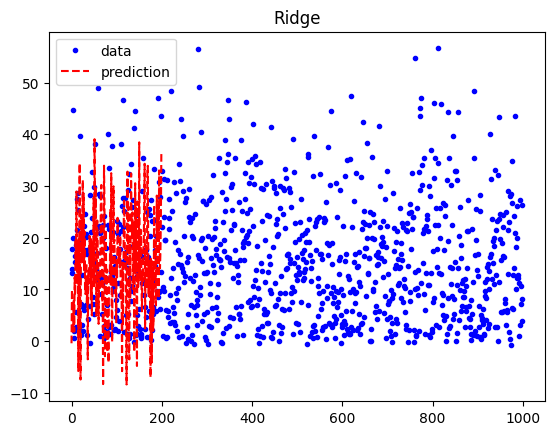

In [58]:
# 간단한 분포 시각화

import matplotlib.pyplot as plt

plt.plot(Y, "b.",label = "data")
plt.plot(Y_pred,"r--",label = "prediction")

plt.title("Ridge")
plt.legend()
plt.show()